# K Nearest Neighbors Project 

This will be a simple project, using the KNN_Project_Data data sets on <a  href='https://www.kaggle.com/datasets/tbyrnes/knn-project-data/code'> kaggle.com.

___

## Import the Libraries

In [24]:
#Data Manipulations
import numpy as np
import pandas as pd

#Data Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

#Style Visualizations
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')
rcParams['figure.figsize'] = (12,6)

## Load the Data

In [3]:
df = pd.read_csv('KNN_Project_Data')

In [4]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [5]:
df.shape

(1000, 11)

In [6]:
df.describe()

XVPM         GWYH         TRAT         TLLZ         IGGA  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1055.071157   991.851567  1529.373525   495.107156   940.590072   
std     370.980193   392.278890   640.286092   142.789188   345.923136   
min      21.170000    21.720000    31.800000     8.450000    17.930000   
25%     767.413366   694.859326  1062.600806   401.788135   700.763295   
50%    1045.904805   978.355081  1522.507269   500.197421   939.348662   
75%    1326.065178  1275.528770  1991.128626   600.525709  1182.578166   
max    2117.000000  2172.000000  3180.000000   845.000000  1793.000000   

              HYKR         EDFS         GUUB         MGJM         JHZC  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1550.637455  1561.003252   561.346117  1089.067338  1452.521629   
std     493.491988   598.608517   247.357552   402.666953   568.132005   
min      27.930000    31.960000    13.520000    23.210000    30.890000   
25%    1219.267077  1132.097865   381.704293   801.849802  1059.499689   
50%    1564.996551  1565.882879   540.420379  1099.087954  1441.554053   
75%    1891.937040  1981.739411   725.762027  1369.923665  1864.405512   
max    2793.000000  3196.000000  1352.000000  2321.000000  3089.000000   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


## Exploratory Data Analysis

___

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

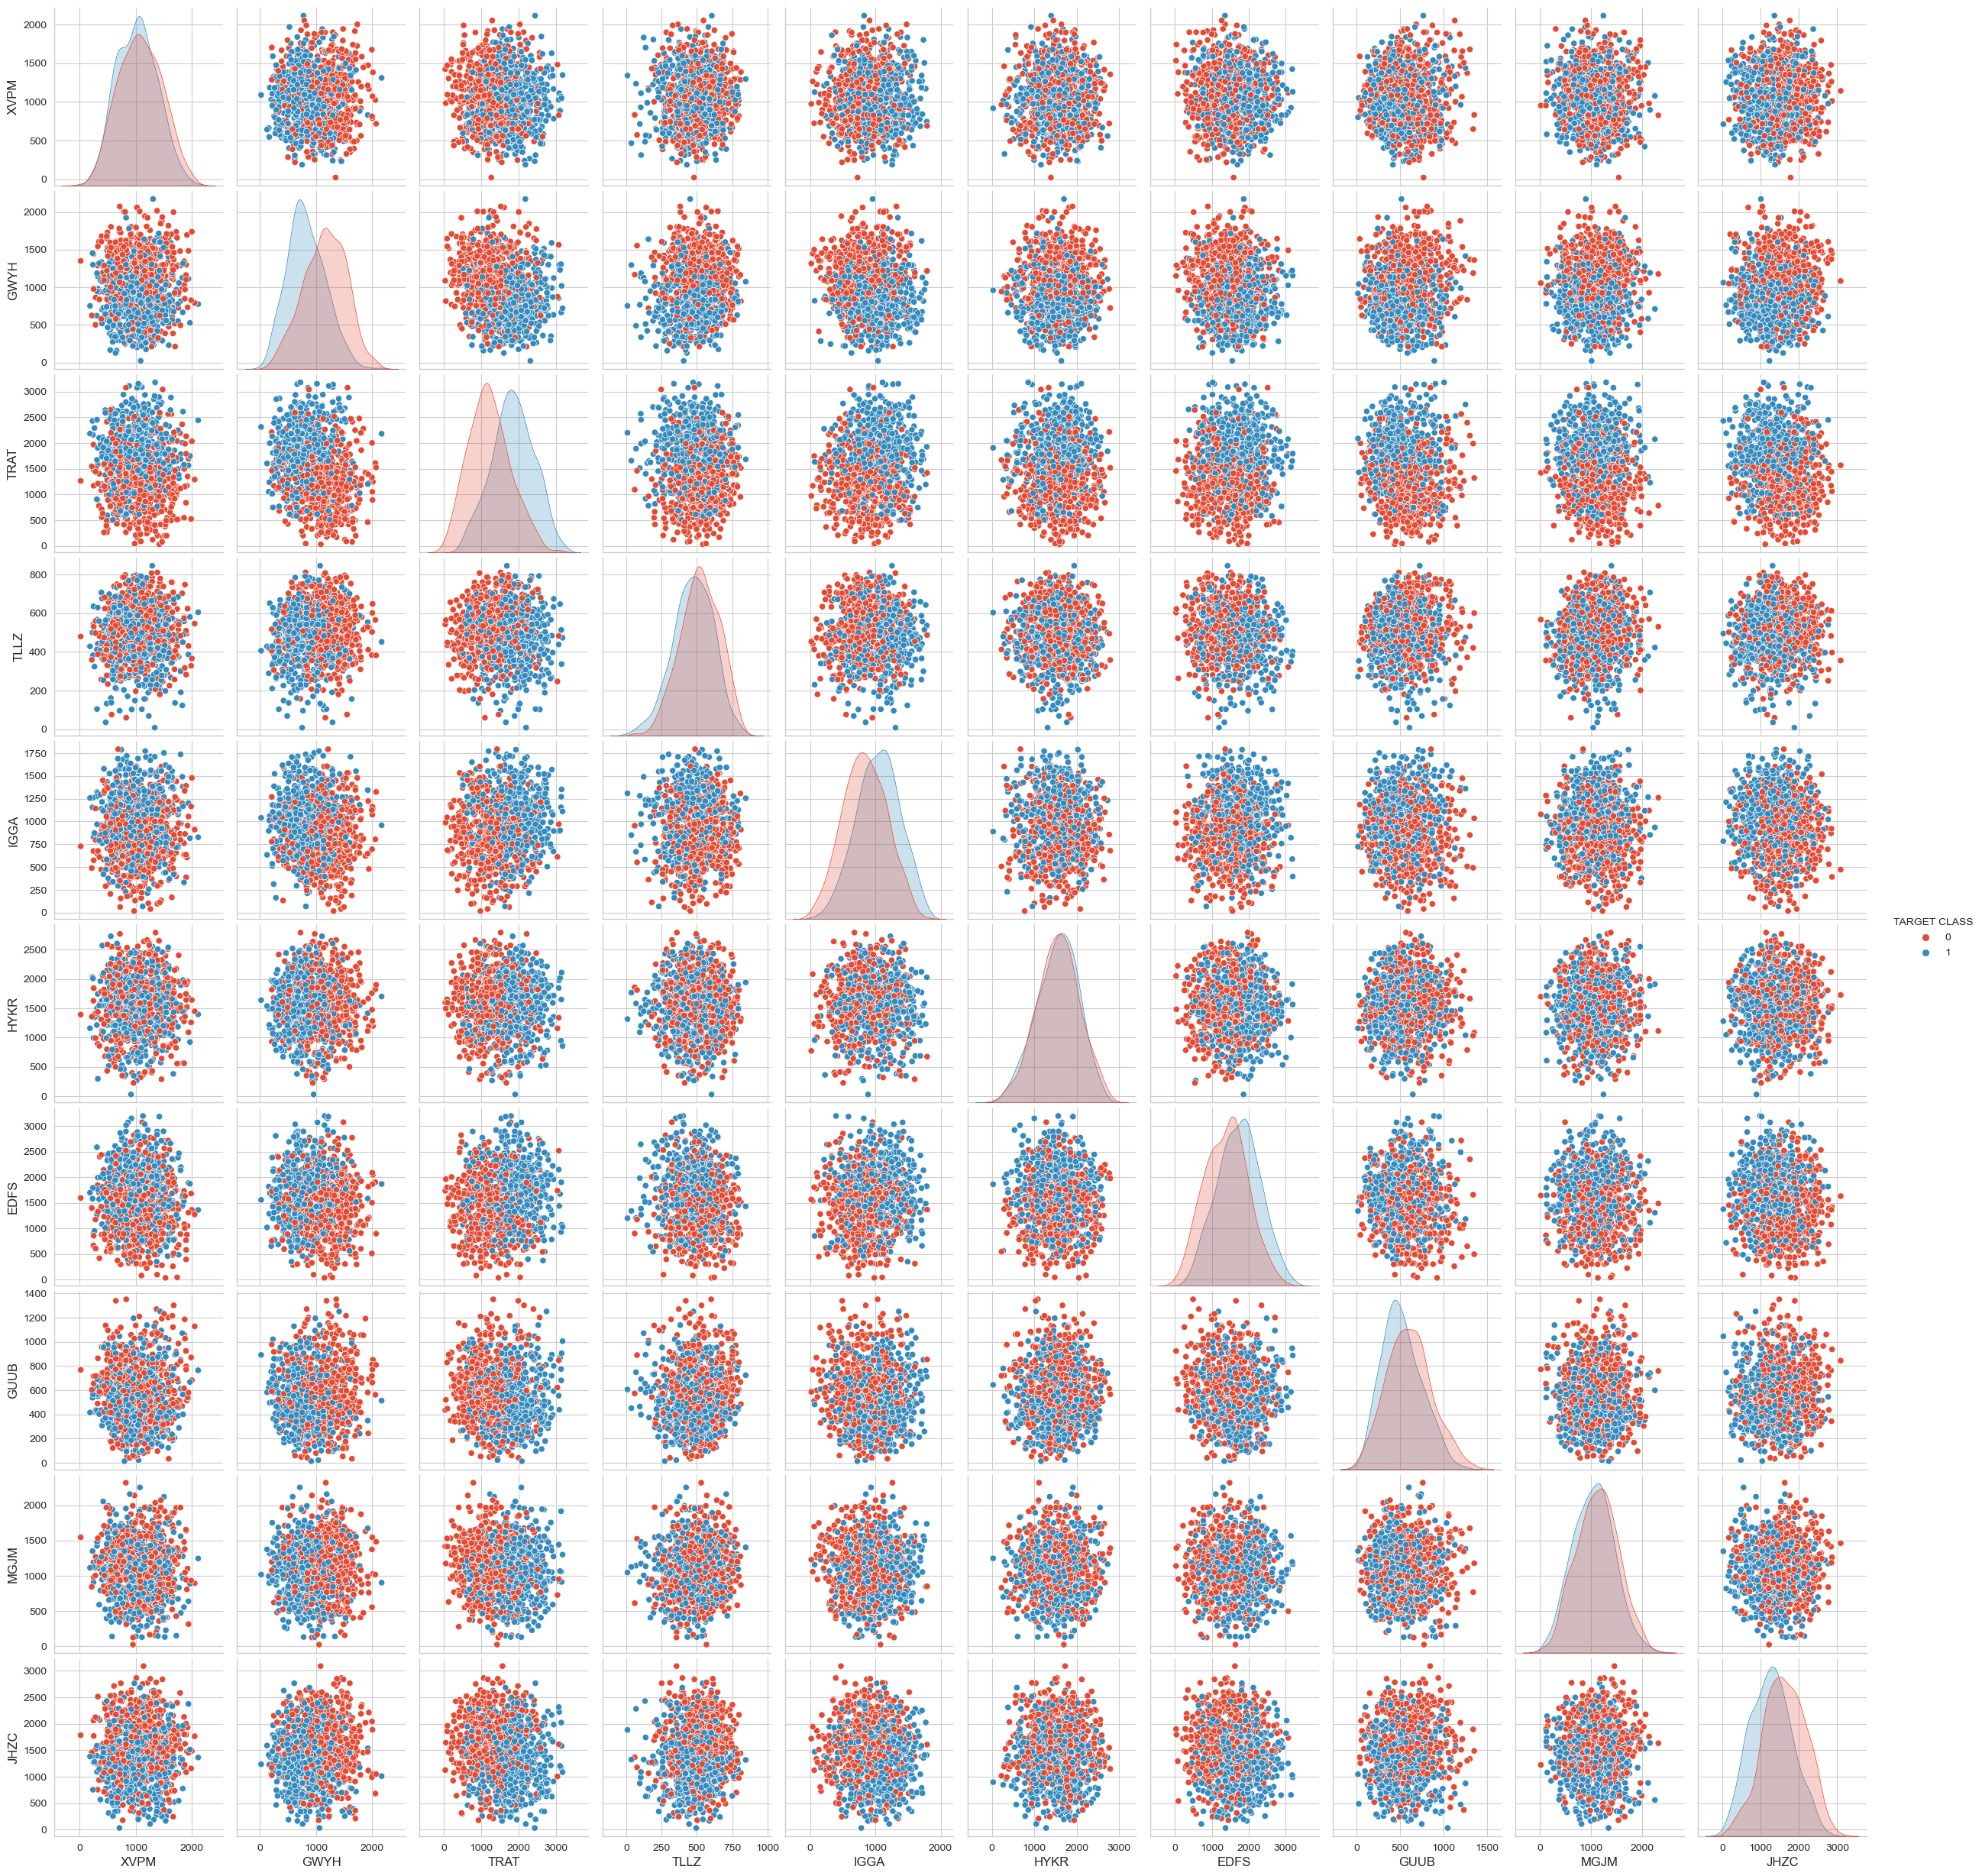

In [8]:
sns.pairplot(data=df, hue='TARGET CLASS')

## Standardize the Variables



**Import StandardScaler from Scikit-Learn.**

In [10]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object.**

In [11]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [12]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

**Transform the features to a scaled version.**

In [13]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

**Convert the scaled features to a dataframe.**

In [14]:
df_features = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [15]:
df_features.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

### Train Test Split

**Split up the data into a training set and test set. X to scaled_features and y to column target. Uses 30% samples data and random_state=101.**

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.3, random_state=101)

### Using KNN

**Import KNeighborsClassifier from Scikit-Learn.**

In [20]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Predicting Test Data Sets


**Predict off the X_test set of the data.**

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
y_pred = knn.predict(X_test)

## Evaluating the Model

**Create a Classification Report, Confusion Matrix Array, and Confusion Matrix Plot for the model.**

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [28]:
confusion_matrix(y_test, y_pred)

array([[109,  43],
       [ 41, 107]], dtype=int64)

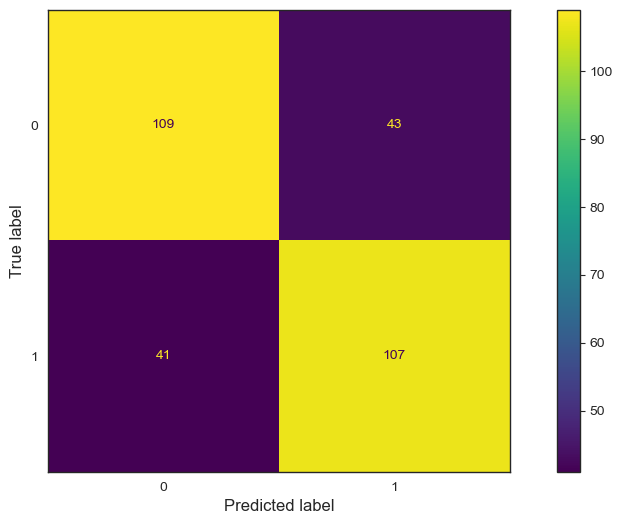

In [29]:
sns.set_style('white')
plot_confusion_matrix(knn, X_test, y_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



## Choosing a K Value


**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [31]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Create the following plot using the information from the loop.**

Text(0, 0.5, 'Error Rate')

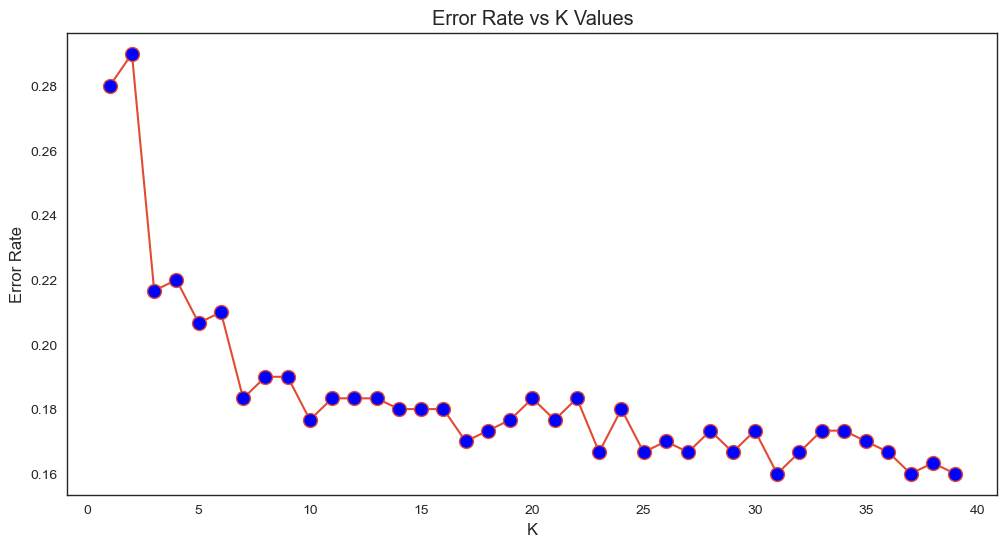

In [35]:
plt.plot(range(1,40), error_rate, ls='-', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Retrain with new K Value

**Retrain the model with the best K value and redo the classification report and the confusion matrix.**

In [37]:
# Using K Value = 10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('\n')
print('K Value = 10')
confusion_matrix(y_test, y_pred)



K Value = 10


array([[130,  22],
       [ 31, 117]], dtype=int64)

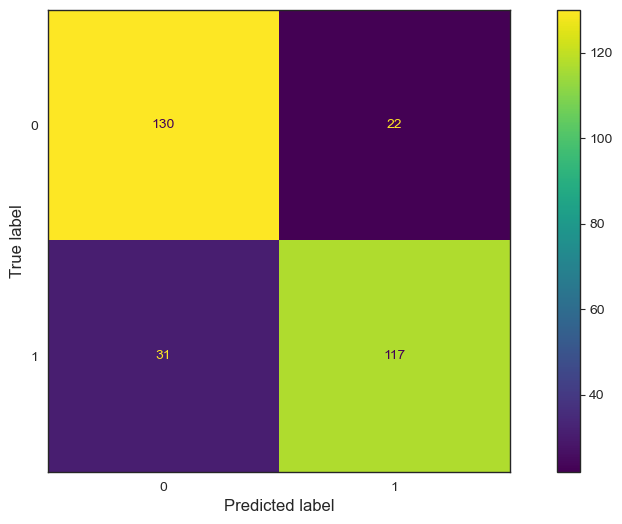

In [38]:
plot_confusion_matrix(knn, X_test, y_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       152
           1       0.84      0.79      0.82       148

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



___

In [40]:
# Using K Value = 20
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('\n')
print('K Value = 20')
confusion_matrix(y_test, y_pred)



K Value = 20


array([[125,  27],
       [ 28, 120]], dtype=int64)

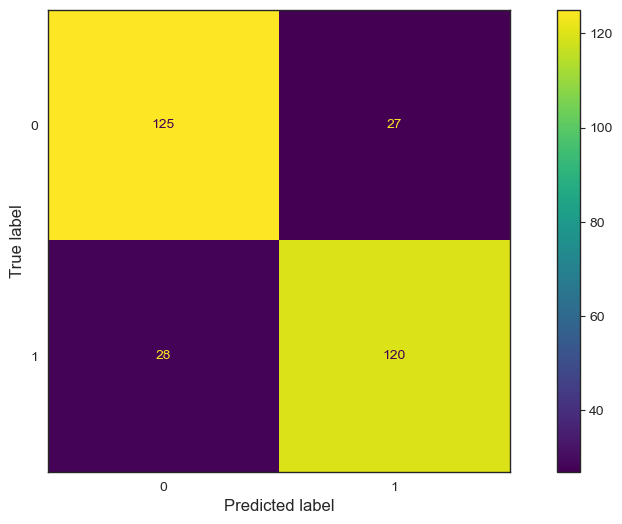

In [41]:
plot_confusion_matrix(knn, X_test, y_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       152
           1       0.82      0.81      0.81       148

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



___

In [43]:
# Using K Value = 30
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('\n')
print('K Value = 30')
confusion_matrix(y_test, y_pred)



K Value = 30


array([[124,  28],
       [ 24, 124]], dtype=int64)

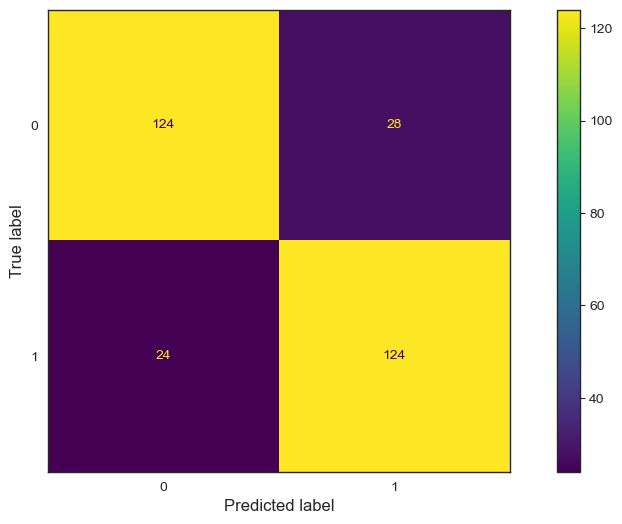

In [46]:
plot_confusion_matrix(knn, X_test, y_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



___

In [49]:
# Using K Value = 40
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('\n')
print('K Value = 40')
confusion_matrix(y_test, y_pred)



K Value = 40


array([[125,  27],
       [ 24, 124]], dtype=int64)

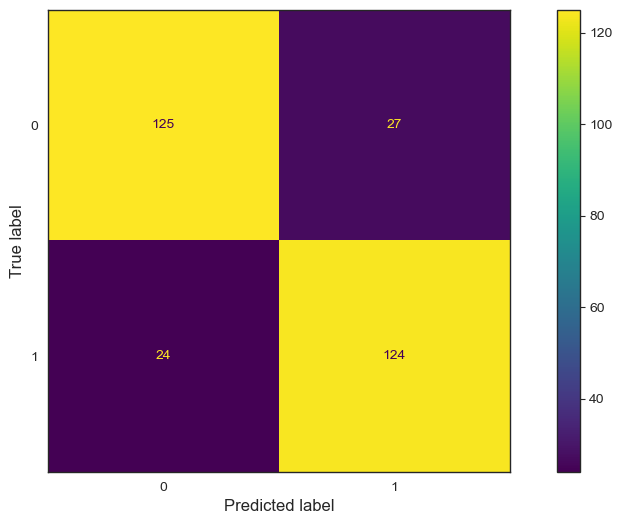

In [50]:
plot_confusion_matrix(knn, X_test, y_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



## Conclusion

From the loop, which has a range of (1,40), the list finds the best K value. There are two categories for the best K value which are K=30 and K=40 with a score of 83.